# Goal
Do a rough estimate of the oxygen mass using the Jerkstrand+2014 method.


In [1]:
import sys
import warnings
warnings.filterwarnings("ignore", module="dynesty.sampling")
import numpy as np
import matplotlib.pyplot as plt
import astropy.constants as aconst
import astropy.units as u
from dynesty import plotting as dyplot
from dynesty import utils as dyfunc

try:
    import snelib19odp
except ImportError:
    sys.path.append('../lib')
import snelib19odp.dataloader as dataloader
import snelib19odp.analysis.oxygen as oxygen
import snelib19odp.blackbody as blackbody
import snelib19odp.specds as specds

In [2]:
sds = specds.load_dataset('SN2019odp')

In [3]:
#spec = dataloader.load_obs_spec('ZTF19abqwtfu_20200821_Keck1_v1.ascii', fluxcal=False)

#spec = dataloader.load_obs_spec('ZTF19abqwtfu_20200124_Keck1_v1.ascii', fluxcal=False)
spec = sds['ZTF19abqwtfu_20200821_Keck1_v1']
#spec = sds['ZTF19abqwtfu_20200124_Keck1_v1']
spec = spec[~np.isnan(spec['flux'])]
spec

<Table length=5127>
   col1       col2         col3    ... fluxerr mask      restwave     
 float64    float64      float64   ... float64 bool      float64      
--------- ------------ ----------- ... ------- ---- ------------------
3055.5166 -2.51726e-17 1.59557e-16 ...     nan True 3012.2813261261117
3057.4631  6.28556e-18 1.40631e-16 ...     nan True 3014.2002833333167
3059.4104  1.00302e-17 1.48725e-16 ...     nan True 3016.1200292205967
3061.3582 -1.59771e-18 1.56783e-16 ...     nan True 3018.0402680329234
3063.3064  1.91786e-17 1.57387e-16 ...     nan True  3019.960901185287
3065.2554  -5.9848e-18 1.63794e-16 ...     nan True 3021.8823230177263
3067.2048  2.48519e-18 1.39915e-16 ...     nan True  3023.804139190203
 3069.155 -1.21535e-17 1.35701e-16 ...     nan True 3025.7267440427545
3071.1057 -1.03304e-17 1.35954e-16 ...     nan True 3027.6498418203523
3073.0569  2.48908e-17 1.09118e-16 ...     nan True 3029.5734325229973
      ...          ...         ... ...     ...  ...                ...
10293.091 -6.05665e-18 3.05589e-16 ...     nan True 10147.444725849877
10294.274  4.67831e-18 3.43863e-16 ...     nan True 10148.610986510612
10295.458  6.19519e-18 3.45899e-16 ...     nan True 10149.778233021443
10296.641 -3.26471e-18 3.25493e-16 ...     nan True 10150.944493682178
10297.824 -4.06938e-18  2.9428e-16 ...     nan True 10152.110754342915
10299.007 -9.96087e-18 2.20686e-16 ...     nan True 10153.277015003652
10300.191  5.60149e-18 1.49767e-16 ...     nan True 10154.444261514484
10301.374 -1.84071e-18 1.33735e-16 ...     nan True 10155.610522175219
10302.557   2.7053e-18  1.4636e-16 ...     nan True 10156.776782835956
 10303.74 -8.23702e-19  1.6083e-16 ...     nan True  10157.94304349669

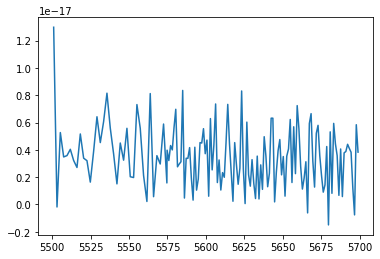

In [4]:
idx = np.logical_and(spec['restwave'] > 5500, spec['restwave'] < 5700)
plt.plot(spec['restwave'][idx], spec['flux'][idx])
continuum_level_5577 = 1/1e18
continuum_slope_5577 = -0.01/1e18
amplitude_5577 = 1e-16
line_width = 30
#modflux = oxygen.generation_func_5577(spec['restwave'][idx], continuum_level_5577, continuum_slope_5577, amplitude_5577, line_width, 0.0)
#plt.plot(spec['restwave'][idx], modflux)

In [5]:
#cfg = oxygen.FitSetup(spec=spec, smp=1, start5577=5520, stop5577=5700, start6300_6364=6250, stop6300_6364=6450, extra_lines=np.array([6243]))
cfg = oxygen.FitSetup(spec=spec, smp=1, start5577=5520, stop5577=5669, start6300_6364=6150, stop6300_6364=6450, extra_lines=np.array([6243]))
cfg = oxygen.FitSetup(spec=spec, smp=1, start5577=5520, stop5577=5669, start6300_6364=6150, stop6300_6364=6450, extra_lines=np.array([]))

#cfg = oxygen.FitSetup(spec=spec, smp=1, start5577=5520, stop5577=5700, start6300_6364=6250, stop6300_6364=6500)

In [6]:
results, samples = oxygen.run_dynesty_fit(cfg)

59246it [10:57, 90.05it/s, batch: 5 | bound: 500 | nc: 25 | ncall: 1493524 | eff(%):  3.967 | loglstar: -940.803 < -932.664 < -934.999 | logz: -974.710 +/-  0.272 | stop:  0.786]          


	Mean: array([ 3.20441597e+00,  3.65628362e+03,  3.35938389e+01,  3.48172688e-01,
       -1.57407134e-03,  4.90168237e-04,  7.53957066e-03,  1.98153217e+26,
       -8.99650084e-01,  1.35122977e+00, -2.83910494e-01, -5.44447932e-01,
        7.77716518e-01])
	Cov: array([[ 1.11106491e+00, -2.42840622e+02,  2.53451232e-04,
		         1.11088319e-03, -8.61408204e-05,  3.77613858e-06,
		         2.09773647e-06, -6.93793673e+20,  2.07463206e-02,
		         2.25354215e-03, -2.42730168e-04, -2.31001661e-01,
		         3.08311525e-03],
		       [-2.42840622e+02,  6.07233664e+04, -5.33740817e+00,
		        -1.25144570e-01, -1.89936376e-02, -5.10021854e-04,
		         5.23548608e-03,  4.11271866e+23,  7.53202963e+00,
		         4.64550250e+00, -8.66522097e-01,  5.31718040e+01,
		        -1.47521158e+00],
		       [ 2.53451232e-04, -5.33740817e+00,  7.91729945e-01,
		         1.71458574e-03,  3.06895636e-06, -6.05837126e-06,
		         6.97933897e-05,  2.64034785e+20,  4.02737243e-01,
		        -8

In [7]:
#oxygen.prior(np.zeros(8), 1.9797431366150075e+26, 1.983371407166366e+26)

In [8]:
9.7e41/1.979e26**2

2.4767384469726467e-11

In [9]:
distance = 1.97e26
oxygen_mass = 0.005
lte_temp = 500
#oxygen.luminosity2flux(oxygen.calculate_line_luminosity_5577(oxygen_mass, lte_temp), distance)

In [10]:
np.log(5)

1.6094379124341003

In [11]:
np.log(1e-8)

-18.420680743952367

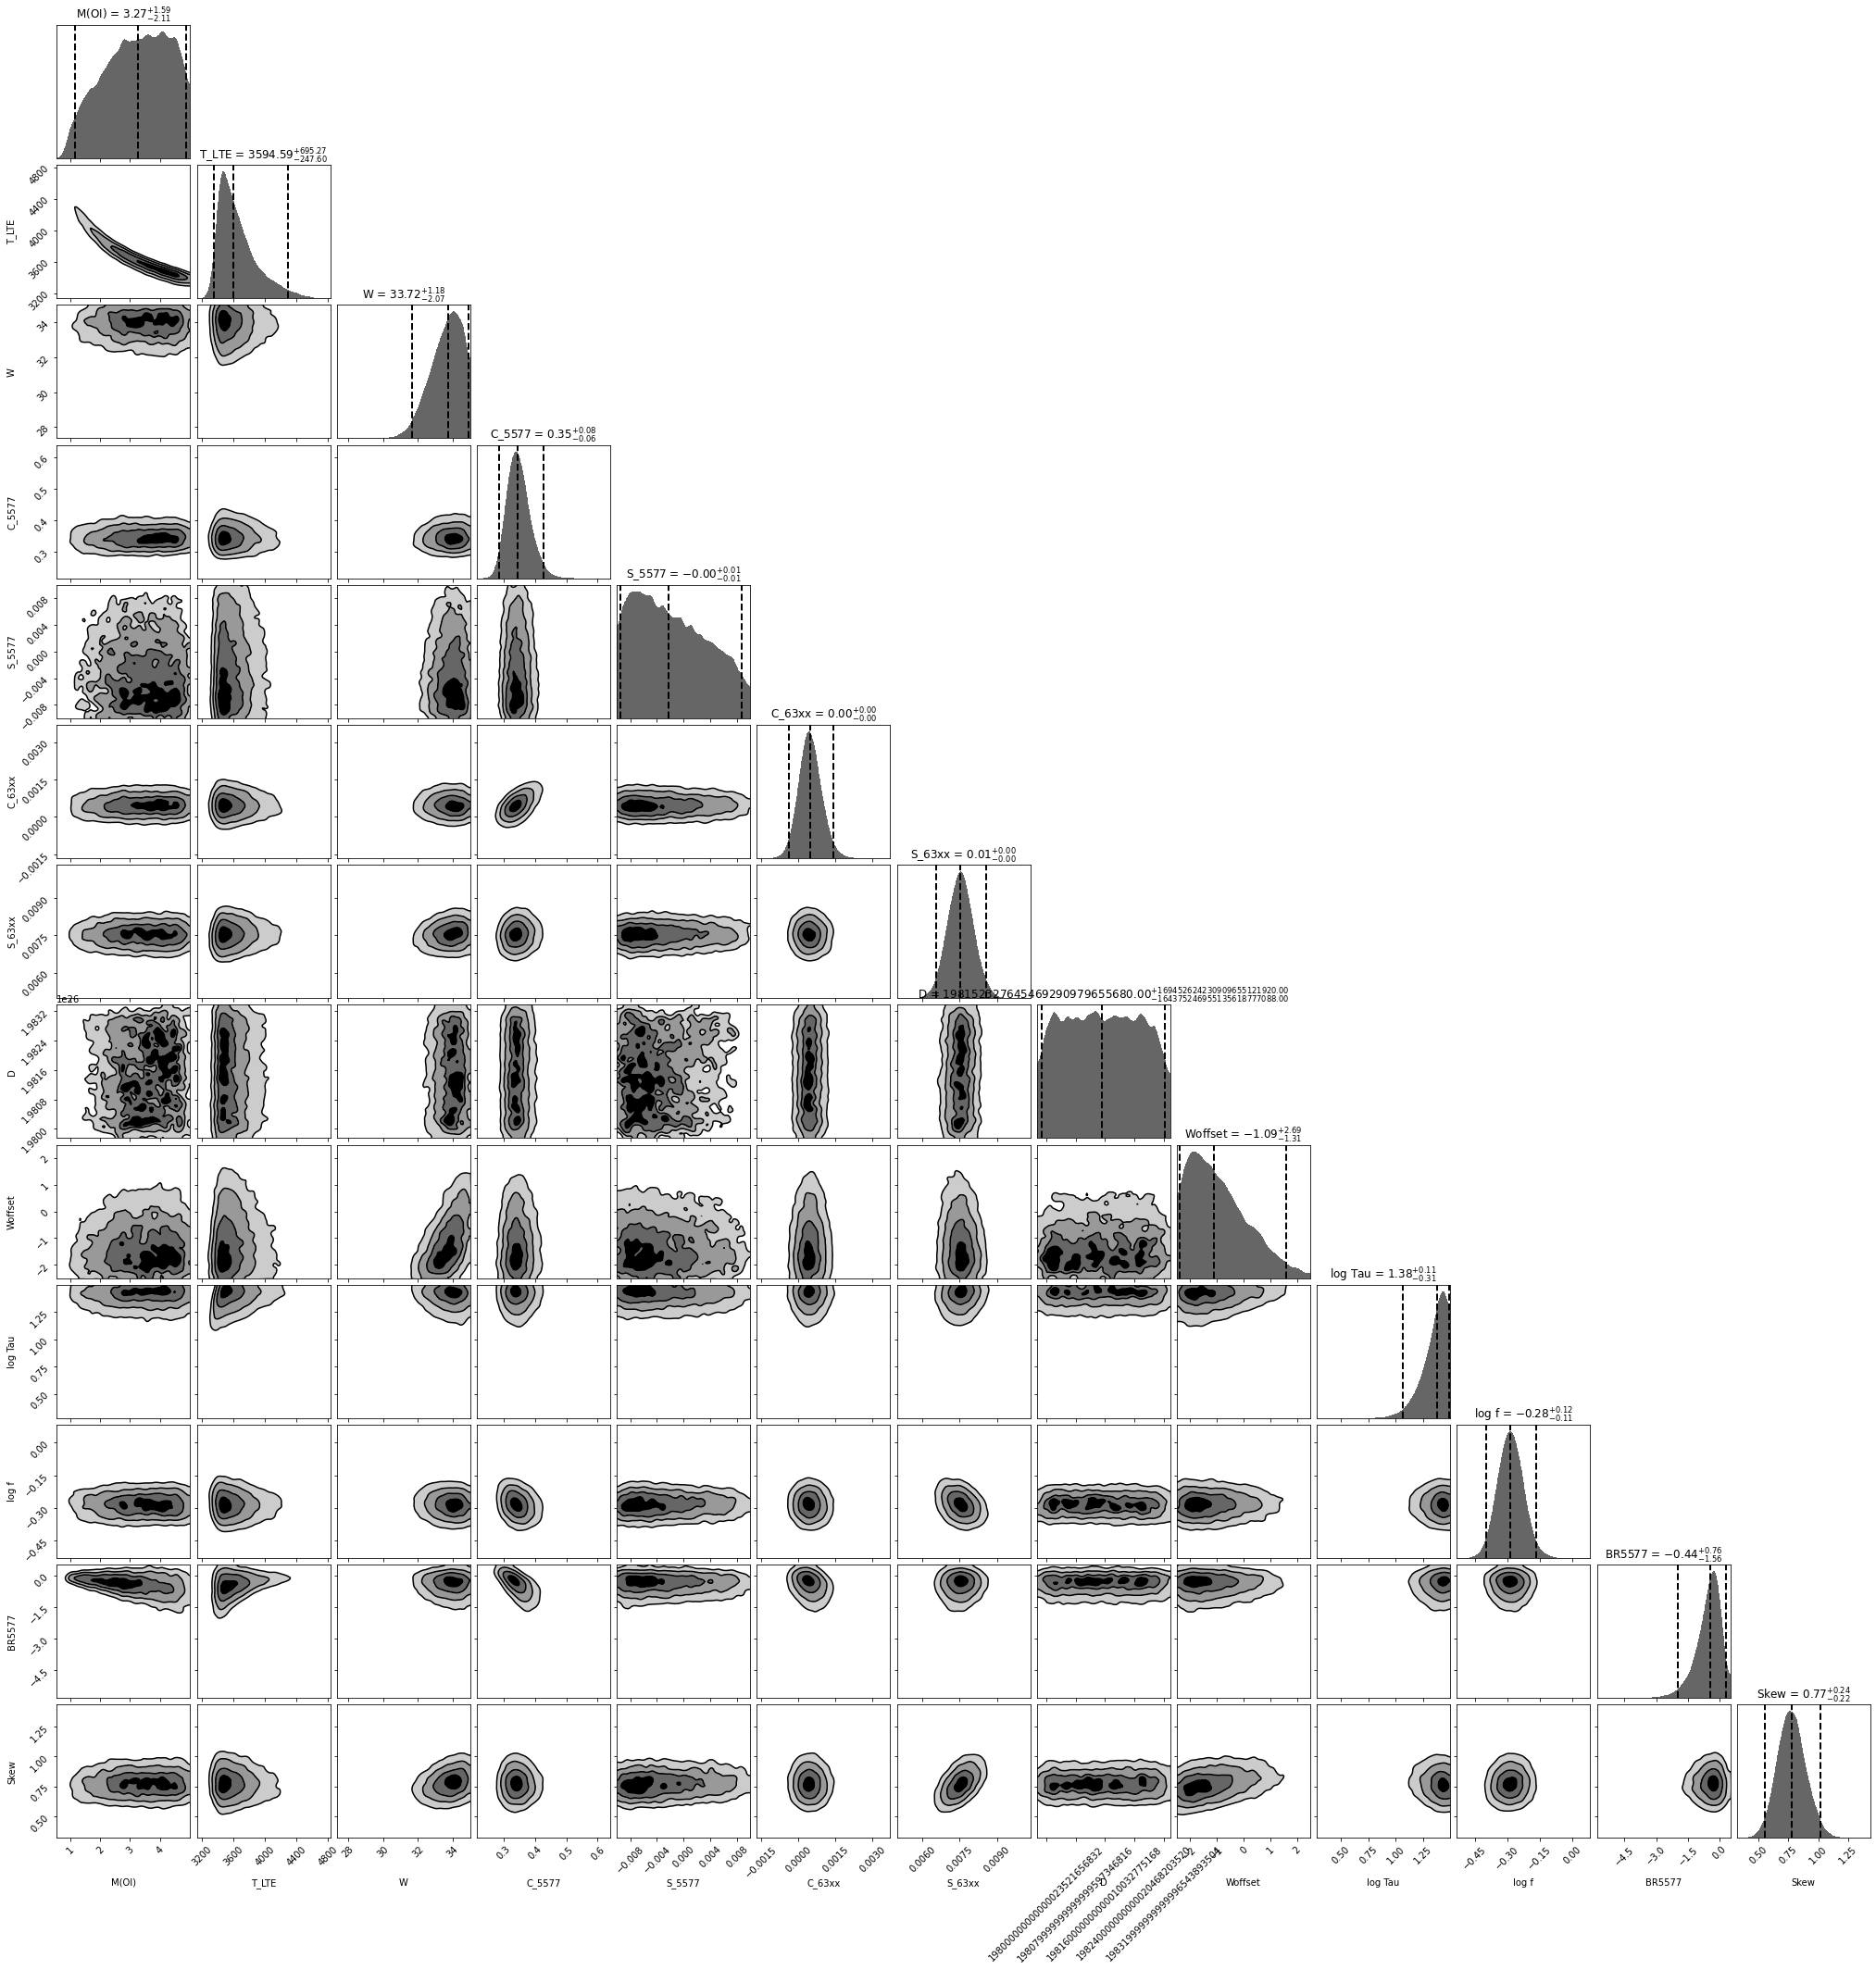

In [12]:
LABELS = ['M(OI)', 'T_LTE', 'W', 'C_5577', 'S_5577', 'C_63xx', 'S_63xx', 'D', 'Woffset', 'log Tau', 'log f', 'BR5577', 'Skew', 'A6243']
_=dyplot.cornerplot(results, labels=LABELS, show_titles=True)

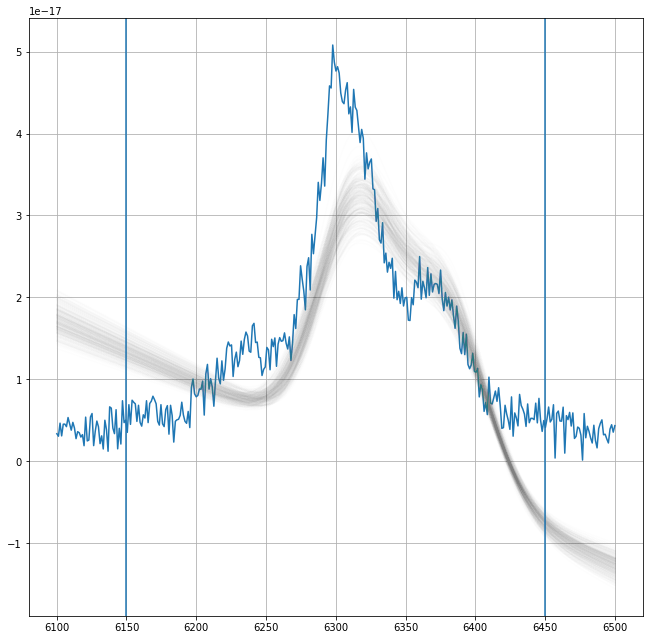

In [13]:
plt.figure(figsize=(11,11))

idx = np.logical_and(spec['restwave'] > 6100, spec['restwave'] < 6500)
plt.plot(spec['restwave'][idx], spec['flux'][idx])
#continuum_level_6300_6364 = 0.3e-17
#continuum_slope_6300_6364 = 0.03/1e18
#amplitude_6300 = 1.3e-15
#amplitude_6364 = 0.5e-15
#line_width = 16
#modflux = oxygen.generation_func_5577(spec['restwave'][idx], continuum_level_5577, continuum_slope_5577, amplitude_5577, line_width)

samples, weights = results.samples, np.exp(results.logwt - results.logz[-1])
new_samples = dyfunc.resample_equal(samples, weights)

#print(len(new_samples))
#print(cfg.extra_lines.dtype)
for i in range(300):
    p = new_samples[(i*38) % len(new_samples)]
    #oxygen_mass = np.exp(p[0])
    p = np.array(p, copy=True)
    #p[0] /= 1.3
    #oxygen_masses[i] = p[0]
    
    line_width = p[2]#*1.3
    wlen_offset = p[8]
    line_skew = p[12]
    #p[9] -= 3

    continuum_level_5577 = p[3]/1e17
    continuum_level_6300_6364 = p[4]/1e17

    continuum_slope_5577 = p[5]/1e17
    continuum_slope_6300_6364 = p[6]/1e17
    
    extra_lines_amps = np.exp(p[13:])/1e17
    #print(extra_lines_amps.dtype)

    fluxes = oxygen.create_fluxes(p)
    #fluxes = create_fluxes(p)
    
    amplitude_5577 = fluxes[0]
    amplitude_6300 = fluxes[1]
    amplitude_6364 = fluxes[2]
    
    #print(spec['restwave'][idx]+wlen_offset)
    modflux = np.empty(len(spec['restwave'][idx]))
    for j in range(len(modflux)):
        modflux[j] = oxygen.generation_func_6300_6364((spec['restwave'][idx]+wlen_offset)[j], continuum_level_6300_6364, continuum_slope_6300_6364, amplitude_6300, amplitude_6364, line_width, line_skew, cfg.extra_lines, extra_lines_amps)
    plt.plot(spec['restwave'][idx], modflux, alpha=0.01, color='grey')
plt.axvline(cfg.start6300_6364)
plt.axvline(cfg.stop6300_6364)
plt.grid()
#plt.gca().set_ylim((0.0e-17, 4e-17))
#plt.hist(oxygen_masses)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

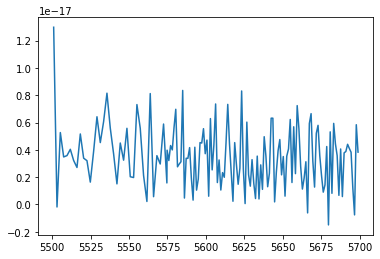

In [14]:
idx = np.logical_and(spec['restwave'] > 5500, spec['restwave'] < 5700)
plt.plot(spec['restwave'][idx], spec['flux'][idx])

for i in range(1000):
    p = new_samples[i*7]
    #oxygen_mass = np.exp(p[0])
    oxygen_mass = p[0]
    lte_temp = p[1]

    line_width = p[2]
    line_skew = p[12]

    continuum_level_5577 = p[3]/1e17
    continuum_level_6300_6364 = p[4]/1e17

    continuum_slope_5577 = p[5]/1e17
    continuum_slope_6300_6364 = p[6]/1e17

    distance = p[7]

    wlen_offset = p[8]

    line_ratio = p[9]

    fluxes = oxygen.create_fluxes(p)
    #fluxes = create_fluxes(p)
    
    amplitude_5577 = fluxes[0]
    amplitude_6300 = fluxes[1]
    amplitude_6364 = fluxes[2]

    modflux = oxygen.generation_func_5577(spec['restwave'][idx], continuum_level_5577, continuum_slope_5577, amplitude_5577, line_width, line_skew)
    plt.plot(spec['restwave'][idx], modflux, alpha=0.01, color='grey')
#plt.gca().set_ylim((0.0e-17, 4e-17))

In [ ]:
plt.figure(figsize=(11,8))
idx = np.logical_and(spec['restwave'] > 0, spec['restwave'] < 9000)
plt.plot(spec['restwave'][idx], spec['flux'][idx])

wavs = np.linspace(4000, 9000)
sed = blackbody.bb(2400, 9e-23, wavs)
plt.plot(wavs, sed)

In [ ]:

CONST_M_P = aconst.m_p.cgs.value
CONST_H = aconst.h.cgs.value
MSOL_TO_CGS = u.M_sun.to(u.g)
ANGS_TO_CM = u.Angstrom.to(u.cm)
CONST_K_B_EV = 8.617333262145e-5 # eV/K

def partition_function(temperature):
    # for now approximate with g of the ground state
    return 9


mu = 16
m_p = CONST_M_P
oxygen_mass = 10.0
temperature = 2000
beta = (1-np.exp(-1.5))/1.5
line = 6300
A = 5.6e-3
g_u = 5
E_u = 1.97

(oxygen_mass*MSOL_TO_CGS) / mu / m_p * A * CONST_H / (line*ANGS_TO_CM) * g_u / partition_function(temperature) * np.exp(-E_u/CONST_K_B_EV/temperature)

In [ ]:
np.exp(-E_u/CONST_K_B_EV/temperature)

In [ ]:
def luminosity2flux(luminosity, distance):
    return luminosity / 4 / np.pi / distance**2

from astropy.cosmology import Planck15 as cosmology
def redshift2distance(redshift_min, redshift_max):
    dist_cm_min = cosmology.luminosity_distance(redshift_min).to(u.cm).value
    dist_cm_max = cosmology.luminosity_distance(redshift_max).to(u.cm).value
    return dist_cm_min, dist_cm_max

dist_min, dist_max = redshift2distance(oxygen.const.redshift-oxygen.const.redshift_err, oxygen.const.redshift+oxygen.const.redshift_err)

luminosity2flux(2.6402048960280045e+27, dist_min)

In [ ]:
-E_u/CONST_K_B_EV

In [ ]:
16*CONST_M_P*9/5/(aconst.c.cgs.value)*(line*ANGS_TO_CM)/A/beta/CONST_H / MSOL_TO_CGS

In [ ]:
1/9.7e41

In [ ]:
p=np.array(new_samples[5000], copy=True)
p[0]=0
oxygen.create_fluxes(p)

In [ ]:
oxmasses = new_samples[:,0]
temps = new_samples[:,1]
plt.hist(oxmasses * np.exp(-E_u/CONST_K_B_EV/temps))

In [ ]:
oxmasses.dtype

In [ ]:
idx = np.logical_and(spec['restwave'] > 6100, spec['restwave'] < 6500)
plt.errorbar(spec['restwave'][idx], spec['flux'][idx], yerr=spec['flux'][idx]*0.02, ls='')

In [ ]:
dyplot.traceplot(results, labels=LABELS);

In [ ]:
dyplot.cornerpoints(results, labels=LABELS);

In [ ]:
t = np.linspace(2000, 6000)
def plot(line):
    v = np.empty(len(t))
    for i in range(len(t)):
        v[i] = oxygen.calculate_line_luminosity_63xx(1.0, t[i], 1.0, line)
    plt.plot(t, v, label='%d' % line)
plot(6300)
plot(6364)
plt.legend()

In [ ]:
import numba
@numba.njit(inline='always')
def create_fluxes(p):
    oxygen_mass = p[0]
    lte_temp = p[1]
    optical_depth = p[9]

    # estimate line fluxes given oxygen mass and lte_temp
    flux_5577 = oxygen.luminosity2flux(oxygen.calculate_line_luminosity_5577(oxygen_mass, lte_temp, optical_depth), distance)
    flux_6300 = oxygen.luminosity2flux(oxygen.calculate_line_luminosity_63xx(oxygen_mass, lte_temp, optical_depth, 6300), distance)
    flux_6364 = oxygen.luminosity2flux(oxygen.calculate_line_luminosity_63xx(oxygen_mass, lte_temp, optical_depth, 6364), distance)
    
    r = np.empty(3)
    r[0] = flux_5577
    r[1] = flux_6300
    r[2] = flux_6364
    
    return r

In [ ]:
idx = np.logical_and(spec['restwave'] > 5400, spec['restwave'] < 5700)
mean_flux = np.mean(spec['flux'][idx])

In [ ]:
# Lets do some rough estimates with integrated flux
idx = np.logical_and(spec['restwave'] > 6300-60, spec['restwave'] < 6364 + 60)
total_flux = np.trapz(spec['flux'][idx]-mean_flux, spec['restwave'][idx])
total_flux

In [ ]:
from astropy.cosmology import Planck15 as cosmology

def luminosity2flux(luminosity, distance):
    return luminosity / 4 / np.pi / distance**2

redshift = 0.014353
dist_cm = cosmology.luminosity_distance(redshift).to(u.cm).value



total_lum63xx = total_flux * 4 * np.pi * dist_cm**2
total_lum63xx

In [ ]:
# do the same for 5577
idx = np.logical_and(spec['restwave'] > 5577-60, spec['restwave'] < 5577 + 60)
total_flux = np.trapz(spec['flux'][idx]-0.951*mean_flux, spec['restwave'][idx])
total_flux

total_lum5577 = total_flux * 4 * np.pi * dist_cm**2
total_lum5577

In [ ]:
# use that to compute temperature
-25790/np.log(total_lum5577/2/total_lum63xx / 38 / 1.5)

In [ ]:
# Third method via eqn 38
import astropy.units as u

# first spectrum
tau = -3.34
f = 0.1
t = 157.7*24*3600
A6300 = 5.6e-3
lambda6300 = 6300*u.Angstrom.to(u.cm)
velocity = 3000 / 3000
m_ion = np.exp(tau)*16*9/5*f*t**2 / 4.3e29 / A6300 / lambda6300**3 * velocity**3
m_ion

In [ ]:
# second spectrum
tau = -4.44
f = 0.1
t = 368*24*3600
A6300 = 5.6e-3
lambda6300 = 6300*u.Angstrom.to(u.cm)
velocity = 3000 / 3000
m_ion = np.exp(tau)*16*9/5*f*t**2 / 4.3e29 / A6300 / lambda6300**3 * velocity**3
m_ion

### 

In [ ]:
# calculate some fluxes

temps = np.linspace(2500, 7000, 100)

for i in range(5000):
    p = new_samples[(i*38) % len(new_samples)]
    #oxygen_mass = np.exp(p[0])
    p = np.array(p, copy=True)
    #p[0] /= 2
    #oxygen_masses[i] = p[0]
    
    line_width = p[2]
    wlen_offset = p[8]

    continuum_level_5577 = p[3]/1e17
    continuum_level_6300_6364 = p[4]/1e17

    continuum_slope_5577 = p[5]/1e17
    continuum_slope_6300_6364 = p[6]/1e17
    
    f6300 = np.empty(len(temps))
    for i in range(len(temps)):
        p[1] = temps[i]
        fluxes = oxygen.create_fluxes(p)
        f6300[i] = fluxes[1]
    plt.plot(temps, f6300)
plt.xlabel('Temperature [K]')

In [ ]:
import seaborn
seaborn.kdeplot(y=new_samples[:,0], x=new_samples[:,1])
#plt.hist2d(new_samples[:,0], new_samples[:,1])

In [ ]:
lums = np.empty(5000)
for i in range(5000):
    p = new_samples[(i*38) % len(new_samples)]
    #oxygen_mass = np.exp(p[0])
    p = np.array(p, copy=True)
    
    fluxes = oxygen.create_fluxes(p)
    
    f63xx = fluxes[1]+fluxes[2]
    lum63xx = f63xx * 4 * np.pi * dist_cm**2
    lums[i] = lum63xx
seaborn.distplot(lums/1e38)

In [ ]:
24.5/13*0.6

In [ ]:
0.6*np.exp(-4.44)*9.7e41/np.exp(22720/11000)

In [ ]:
@numba.njit(inline='always')
def calculate_line_luminosity_63xx(oxygen_mass, temperature, optical_depth, line):
    """
    Equation 3 from Jerkstrand+2014 (MNRAS439,3694–3703 (2014))
    """

    if line == 6300:
        beta = (1-np.exp(-optical_depth))/optical_depth
        pre_factor = oxygen.LUM_6300_PRE_FACTOR
    elif line == 6364:
        beta = 3*(1-np.exp(-optical_depth/3))/optical_depth
        pre_factor = oxygen.LUM_6364_PRE_FACTOR
    else:
        beta = optical_depth * np.nan
        pre_factor = 1.0

    lum = pre_factor * beta * oxygen_mass / np.exp(oxygen.LUM_63XX_TEMP_FACTOR / temperature)
    return lum

log_tau = np.linspace(-7, 7)
tau = np.exp(log_tau)
f6300 = calculate_line_luminosity_63xx(0.6, 3000, tau, 6300)
f6364 = calculate_line_luminosity_63xx(0.6, 3000, tau, 6364)
ratio = f6300/f6364
plt.plot(log_tau, ratio, label='T=3000K')
f6300 = calculate_line_luminosity_63xx(0.6, 6000, tau, 6300)
f6364 = calculate_line_luminosity_63xx(0.6, 6000, tau, 6364)
ratio = f6300/f6364
plt.plot(log_tau, ratio, label='T=6000K')

In [ ]:
ratios = np.empty(5000)
for i in range(5000):
    p = new_samples[(i*38) % len(new_samples)]
    #oxygen_mass = np.exp(p[0])
    p = np.array(p, copy=True)
    #p[0] /= 2
    #oxygen_masses[i] = p[0]
    
    line_width = p[2]
    wlen_offset = p[8]

    continuum_level_5577 = p[3]/1e17
    continuum_level_6300_6364 = p[4]/1e17

    continuum_slope_5577 = p[5]/1e17
    continuum_slope_6300_6364 = p[6]/1e17
    
    fluxes = oxygen.create_fluxes(p)
    ratios[i] = fluxes[1]/fluxes[2]
    
seaborn.distplot(ratios)

In [ ]:
plt.figure(figsize=(11,11))
idx = np.logical_and(spec['restwave'] > 6100, spec['restwave'] < 6500)
plt.plot(spec['restwave'][idx], spec['flux'][idx], label='Observed')

flux = np.empty(np.count_nonzero(idx))
for i in range(np.count_nonzero(idx)):
    flux[i] = oxygen.generation_func_6300_6364(spec['restwave'][idx][i]-5, 0, -0.1e-18, 0.24e-13, 0.15e-13, 25, np.array([]), np.array([]))

plt.plot(spec['restwave'][idx], flux)
plt.legend()

In [ ]:
import snelib19odp.gaussian as gaussian



plt.figure(figsize=(11,11))
idx = np.logical_and(spec['restwave'] > 6100, spec['restwave'] < 6500)
plt.plot(spec['restwave'][idx], spec['flux'][idx], label='Observed')

wave = spec['restwave'][idx]

plt.plot(wave, gaussian.gaussian(wave, 6300-60, 1.35e-14, 20))
plt.plot(wave, gaussian.gaussian(wave, 6300, 1.9e-14, 20))
plt.plot(wave, gaussian.gaussian(wave, 6300-60, 1.33e-14, 20)+\
         gaussian.flat_top_gaussian(wave, 6300, 1.8e-14, 42, order=4)+\
         gaussian.gaussian(wave, 6364-60, 0.6e-14, 20)+\
         gaussian.flat_top_gaussian(wave, 6364, 1.6e-14, 42, order=4)
        )

plt.legend()

In [ ]:
import snelib19odp.cauchy as cauchy

plt.figure(figsize=(11,11))
idx = np.logical_and(spec['restwave'] > 6100, spec['restwave'] < 6500)
plt.plot(spec['restwave'][idx], spec['flux'][idx], label='Observed')

wave = spec['restwave'][idx]

plt.plot(wave, cauchy.cauchy(wave, 6300-60, 1.35e-14, 20))
plt.plot(wave, cauchy.cauchy(wave, 6300, 1.9e-14, 20))
plt.plot(wave, cauchy.cauchy(wave, 6300-60, 1.2e-14, 23)+\
         cauchy.cauchy(wave, 6300, 2.7e-14, 50)+\
         cauchy.cauchy(wave, 6364-60, 1.0e-14, 23)+\
         cauchy.cauchy(wave, 6364, 2e-14, 50)
        )

plt.legend()

In [ ]:
import snelib19odp.gaussian as gaussian
x = np.linspace(-3,3, 1000)
f = np.empty_like(x)
for i in range(len(x)):
    f[i] = gaussian.gaussian_emg(x[i], 0, 1, 1, 0.22)
plt.plot(x, f, label='EMG')
plt.plot(x, gaussian.gaussian(x, 0, 1, 1), label='Normal')
plt.legend()

In [ ]:
plt.figure(figsize=(11,11))
idx = np.logical_and(spec['restwave'] > 6100, spec['restwave'] < 6500)
plt.plot(spec['restwave'][idx], spec['flux'][idx], label='Observed')

wave = spec['restwave'][idx]

plt.plot(wave, np.vectorize(gaussian.skewed)(wave+30, 6300, 3.9e-14, 70, 4))
plt.plot(wave, \
         np.vectorize(gaussian.skewed)(wave+30, 6364, 0.5e-14, 70, 30)+\
         np.vectorize(gaussian.skewed)(wave+30, 6300, 3.9e-14, 70, 30)
        )
#plt.plot(wave, cauchy.cauchy(wave, 6300, 1.9e-14, 20))
#plt.plot(wave, cauchy.cauchy(wave, 6300-60, 1.2e-14, 23)+\
#         cauchy.cauchy(wave, 6300, 2.7e-14, 50)+\
#         cauchy.cauchy(wave, 6364-60, 1.0e-14, 23)+\
#         cauchy.cauchy(wave, 6364, 2e-14, 50)
#        )

plt.legend()